In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import imblearn
from imblearn.over_sampling import SMOTE
sns.set_theme(style="whitegrid")

In [116]:
df = pd.read_csv(r'C:\Users\User\Desktop\DATA SCIENCE\Kaggle Projects\Hr Analytics Job Prediction\HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


* GOAL : This dataset contains information about employees who worked in a company. This dataset contains information about employees who worked in a company. The objective of the dataset is to build a predictive model in order to predict employees behaviour.

In [117]:
df.shape

(14999, 10)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [119]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [120]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

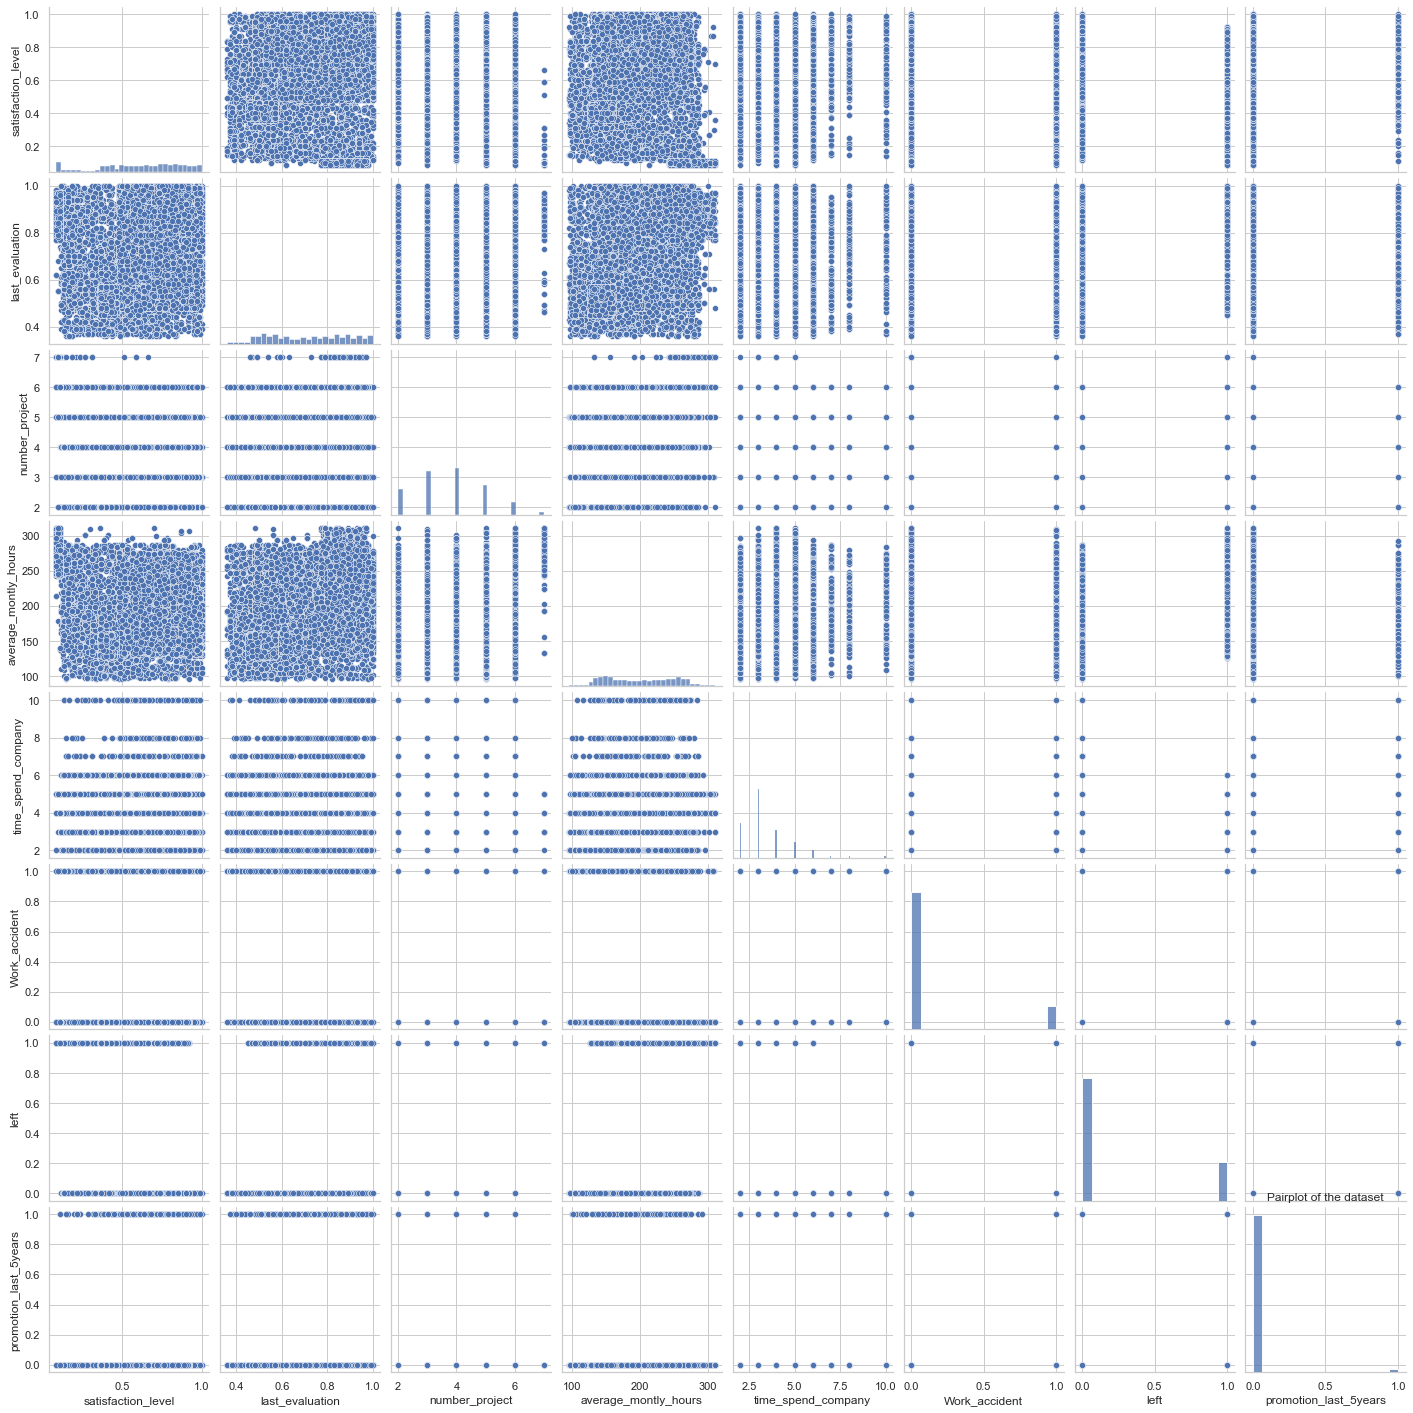

In [121]:
sns.pairplot(df)
plt.title('Pairplot of the dataset')
plt.show()

In [122]:
cont_features=[feature for feature in df.columns if ((df[feature].dtypes!='O'))]
cont_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

satisfaction_level


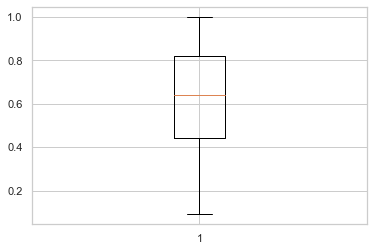

last_evaluation


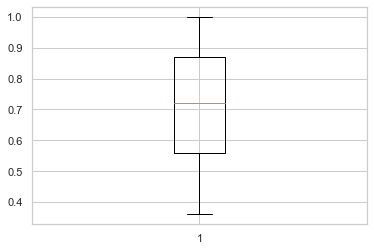

number_project


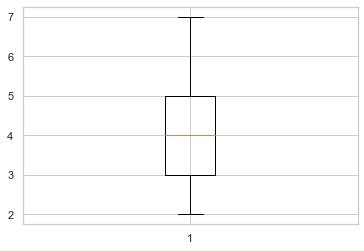

average_montly_hours


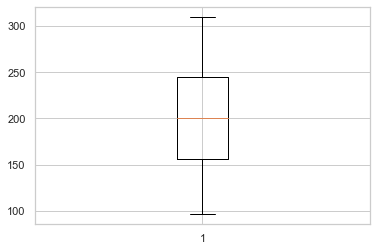

time_spend_company


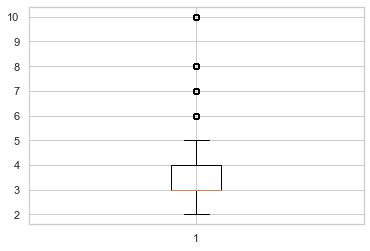

Work_accident


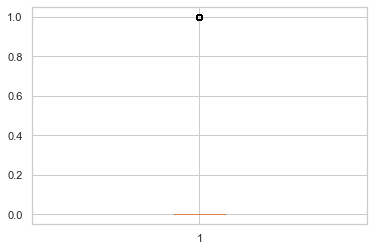

left


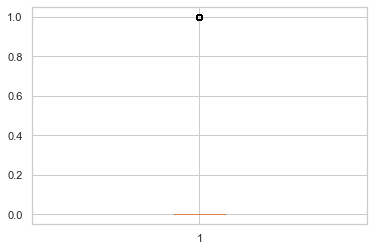

promotion_last_5years


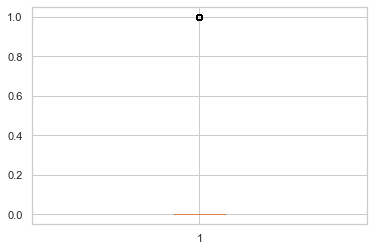

In [123]:
for i in cont_features:
    plt.boxplot(df[i])
    print(i)
    plt.show()

## Exploratory data analysis

#### Heatmap -  to see the co-orelation between variables

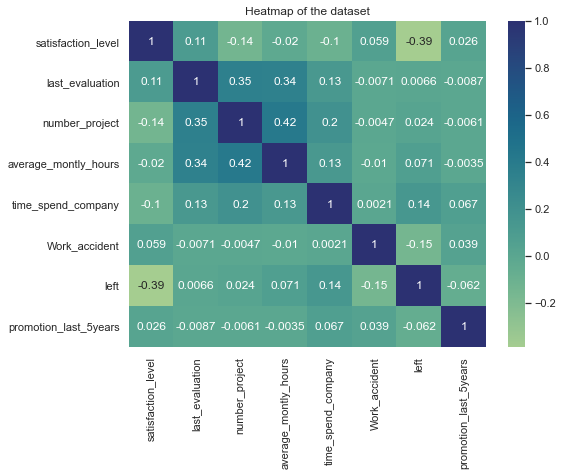

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

#### Bar Chart Showing Impact of Employees Salaries on Retention

In [125]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

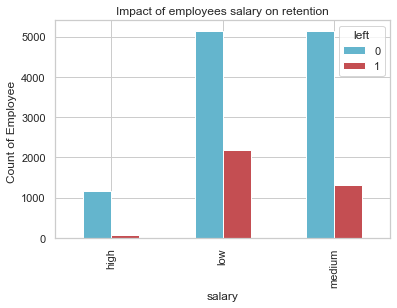

In [126]:
pd.crosstab(df.salary,df.left).plot(kind='bar',color = 'cr')
plt.title('Impact of employees salary on retention')
plt.ylabel('Count of Employee ')
plt.show()

####  Bar chart showing a correlation between department and employee retention

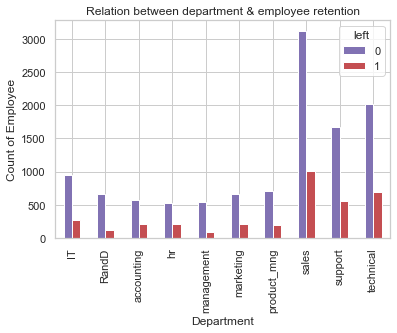

In [127]:
pd.crosstab(df.Department,df.left).plot(kind ='bar',color='mr')
plt.title('Relation between department & employee retention')
plt.ylabel('Count of Employee')
plt.show()

####  Work accident vs Employee retention

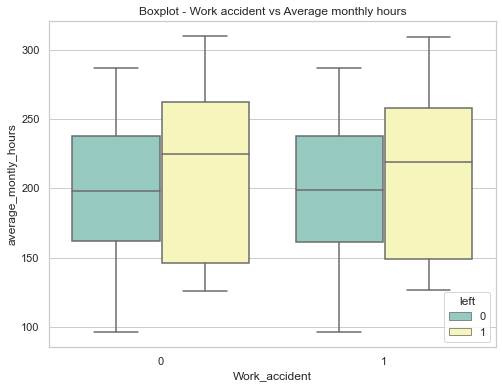

In [128]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Work_accident',y = 'average_montly_hours',hue = 'left',data=df,palette = 'Set3')
plt.title('Boxplot - Work accident vs Average monthly hours')
plt.show()

* Work accidents do not seem to have an effect people leaving the company

#### Promotion_last_5years vs Average monthly hours

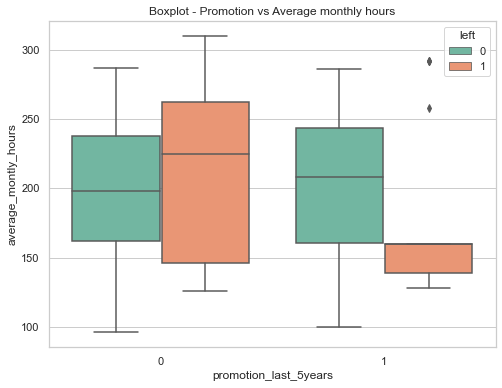

In [129]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'promotion_last_5years',y = 'average_montly_hours',hue = 'left',data=df,palette = 'Set2')
plt.title('Boxplot - Promotion vs Average monthly hours')
plt.show()

#### No. of projects vs employee retention

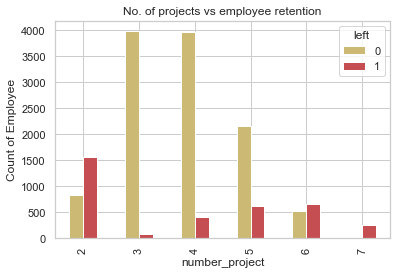

In [130]:
pd.crosstab(df.number_project,df.left).plot(kind ='bar',color='yr')
plt.title('No. of projects vs employee retention')
plt.ylabel('Count of Employee')
plt.show()

## Creating dummies for categorical variables

In [131]:
#Selected variables which has the most impact on employee 
sel_data = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sel_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [132]:
dummies = pd.get_dummies(sel_data.salary)

In [133]:
#Concatenate selected variable and dummy variable
df_final = pd.concat([sel_data,dummies],axis='columns')

In [134]:
df_final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [135]:
df_final.drop('salary',axis='columns',inplace=True)

In [136]:
df_final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


## Standard Scaler

In [138]:
numeric_data = df_final.loc[:,df_final.nunique()>5]
numeric_data.head()

,satisfaction_level,average_montly_hours
0,0.38,157
1,0.80,262
2,0.11,272
3,0.72,223
4,0.37,159


In [139]:
numeric_data = pd.DataFrame(numeric_data)

In [142]:
num_cols = numeric_data.columns.to_list()
sc = StandardScaler()
df_final[num_cols] = sc.fit_transform(df_final[num_cols])

In [143]:
df_final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,-0.936495,-0.882040,0,0,1,0
1,0.752814,1.220423,0,0,0,1
2,-2.022479,1.420657,0,0,0,1
3,0.431041,0.439508,0,0,1,0
4,-0.976716,-0.841993,0,0,1,0


## SMOTE - Oversampling technique

In [144]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

* Since 0 and 1 is imbalanced, so we have to use SMOTE.

In [148]:
X = df_final
y = df['left']

In [149]:
X.shape

(14999, 6)

In [150]:
y.shape

(14999,)

In [151]:
os = SMOTE(random_state=0)

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [153]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X )
os_data_y= pd.DataFrame(data=os_data_y)

In [154]:
os_data_y.value_counts()

left
0       7966
1       7966
dtype: int64

In [155]:
x=os_data_X[columns]
y=os_data_y['left']

In [157]:
x.shape

(15932, 6)

In [158]:
y.shape

(15932,)

### Logistic regression model

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [161]:
y_pred = model.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1722  684]
 [ 650 1724]]


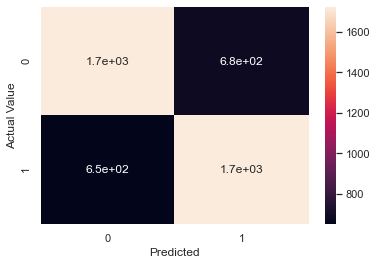

In [164]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      2406
           1       0.72      0.73      0.72      2374

    accuracy                           0.72      4780
   macro avg       0.72      0.72      0.72      4780
weighted avg       0.72      0.72      0.72      4780



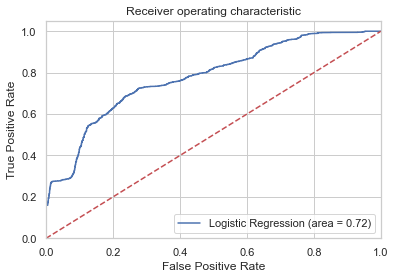

In [169]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()